In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Alcohol_Sales.csv')
df

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [13]:
df=df.rename({'S4248SM144NCEN':'Sales'},axis=1)

In [14]:
df

,DATE,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    325 non-null    object
 1   Sales   325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.6+ KB


In [16]:
df['DATE']=pd.to_datetime(df['DATE'])

In [17]:
df=df.set_index(['DATE'])

In [18]:
df

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


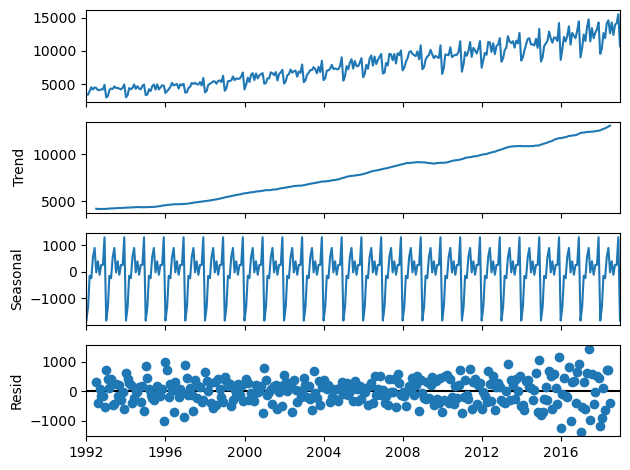

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df)
decomposition.plot();

In [22]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df)
print('1.ADF Statistics:',dftest[0])
print('2.P-Value:',dftest[1])
print('3.No of lags:',dftest[2])
print('4.No of Observations:',dftest[3])
print('5.Critical Values:')
for keys,values in dftest[4].items():
    print(f'{keys}:{values}')
if dftest[1]>0.05:
    print(' Not Stationary')
else:
    print('Stationary')

1.ADF Statistics: 2.0374047259137
2.P-Value: 0.9987196267088919
3.No of lags: 14
4.No of Observations: 310
5.Critical Values:
1%:-3.451621854687657
5%:-2.870908950689806
10%:-2.571761810613944
 Not Stationary


In [24]:
mean=df.rolling(window=12).mean()
std=df.rolling(window=12).std()

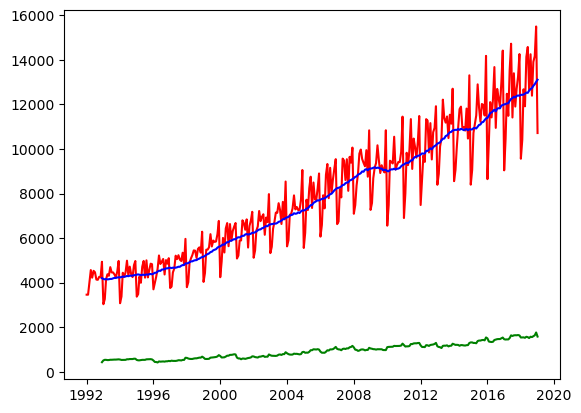

In [25]:
plt.plot(df,color='red',label='Original Value')
plt.plot(mean,color='blue',label='Rolling Mean')
plt.plot(std,color='green',label='Rolling Std')

In [27]:
first_log=np.log(df)
first_log=first_log.dropna()

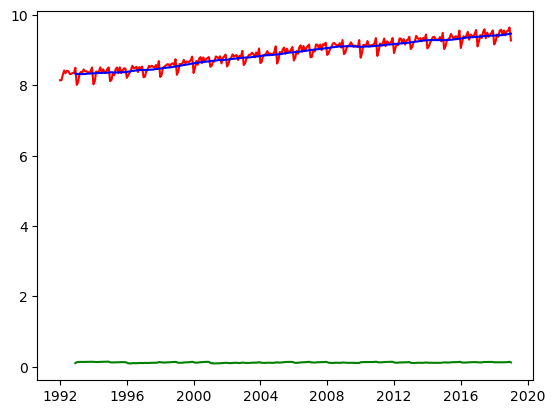

In [29]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()
plt.plot(first_log,color='red',label='Original Label')
plt.plot(mean_log,color='blue',label='Mean Log')
plt.plot(std_log,color='green',label='StdLog')

In [31]:
new_data=first_log-mean_log
new_data=new_data.dropna()

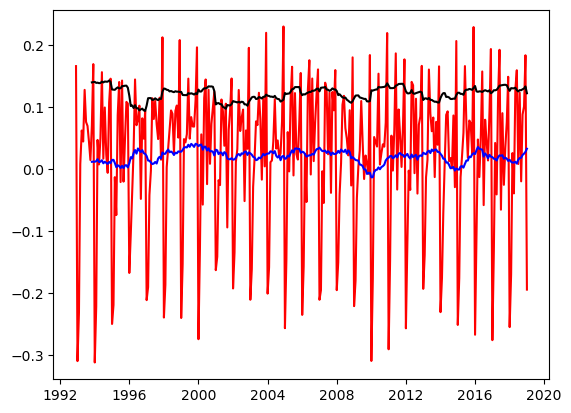

In [32]:
mean_log_new=new_data.rolling(window=12).mean()
std_log_new=new_data.rolling(window=12).std()
plt.plot(new_data,color='red',label='Original label')
plt.plot(mean_log_new,color='blue',label='Rolling Mean')
plt.plot(std_log_new,color='black',label='Rolling Std')

In [34]:
from statsmodels.tsa.stattools import kpss
dftest1=kpss(new_data.dropna())
print('1.KPSS Statistics:',dftest1[0])
print('2.P-Value:',dftest1[1])
print('3.No of lags:',dftest1[2])
print('4.Critical Values:')
for keys,values in dftest1[3].items():
    print(f'{keys}:{values}')
if dftest1[1]<0.05:
    print('Not Stationary')
else:
    print('Stationary')

1.KPSS Statistics: 0.030922037827667267
2.P-Value: 0.1
3.No of lags: 7
4.Critical Values:
10%:0.347
5%:0.463
2.5%:0.574
1%:0.739
Stationary


C:\Users\souvi\AppData\Local\Temp\ipykernel_16884\2083893197.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  dftest1=kpss(new_data.dropna())


In [41]:
new_data

,Sales
DATE,
1992-12-01,0.166458
1993-01-01,-0.310197
1993-02-01,-0.232168
1993-03-01,0.008087
1993-04-01,0.062422
...,...
2018-09-01,-0.019707
2018-10-01,0.088280
2018-11-01,0.101245


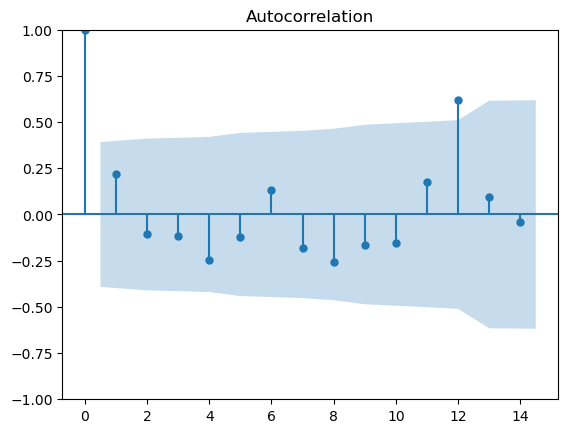

In [35]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
acf_plot=acf(new_data.dropna())
plot_acf=plot_acf(acf_plot)

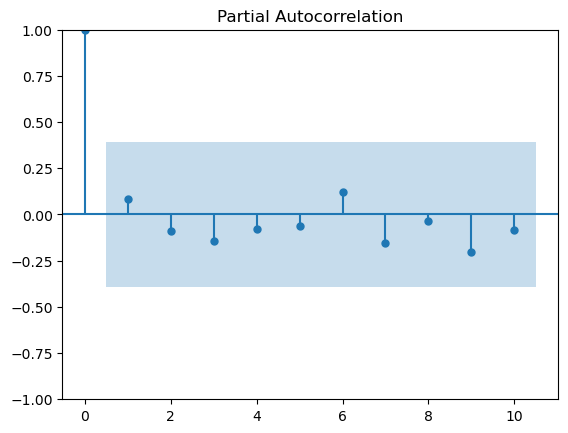

In [36]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
pacf_plot=pacf(new_data.dropna())
plot_pacf=plot_pacf(pacf_plot,lags=10)

In [42]:
train=new_data.iloc[:290]['Sales']
test=new_data.iloc[291:]['Sales']

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit=model.fit()

C:\Users\souvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\souvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [44]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)

In [46]:
new_data.dropna()

,Sales,predict
DATE,,
2017-02-01,-0.132588,-0.134927
2017-03-01,0.042291,0.017579
2017-04-01,-0.040869,-0.003408
2017-05-01,0.115129,0.074232
2017-06-01,0.192841,0.136354
2017-07-01,-0.065503,-0.000012
2017-08-01,0.090402,0.078441
2017-09-01,-0.025359,0.023493
2017-10-01,0.034523,0.042007


<Axes: xlabel='DATE'>

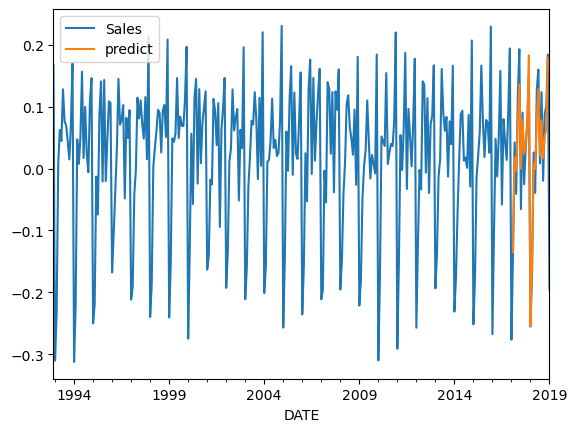

In [47]:
new_data[['Sales','predict']].plot()

In [48]:
forecast=model_fit.forecast(steps=120)

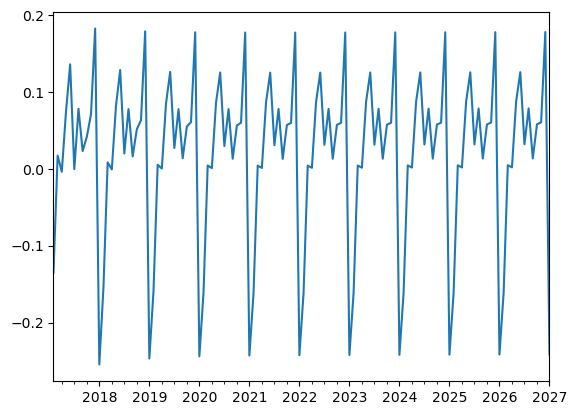

In [52]:
forecast.plot();